# MESSAGE SPAM DETECTION 

The purpose of this paper is to explore the results of applying machine learning techniques to Message spam detection. SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS). The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). This dataset is tab-separated values (TSV) file. More detail about dataset can be found on [this page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/).
* This dataset has been collected from free or free for research sources at the Internet. 
* The collection is composed by just one text file, where each line has the correct class followed by the raw message.

## Introduction

Mobile phone spam also known as (unsolicited messages, especially advertising), directed at the text messaging or other communications services of mobile phones or smartphones. Fighting SMS spam is complicated by several factors (compared to Internet email), including the lower rate of SMS spam, which has allowed many users and service providers to ignore the issue, and the limited availability of mobile phone spam-filtering software. 

In the paper we would try to analysis different methods to identify spam/ham messages. We will use different approach to establish relation between the text and the category, based on size of message, word count, special keywords, using term-frequency inverse document-frequency (tf-idf) transform.

## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("./spam.csv",encoding='latin-1')

## Data Exploration

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
data.rename(columns={'v1':'Class','v2':'Text'},inplace=True)

In [9]:
data['numClass'] = data['Class'].map({'ham':0, 'spam':1})

In [10]:
# Count the number of words in each Text
data['Count']=0
for i in np.arange(0,len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

# Unique values in target set
print("Unique values in the Class set: ", data.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [11]:
# displaying the new table
data.head()

,Class,Text,numClass,Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [12]:
# collecting ham messages in one place 
ham  = data[data.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['Class'].count())
print("Ham Count value", ham_count['Count'].count())

Number of ham messages in data set: 4825
Ham Count value 272


In [13]:
# collecting spam messages in one place 
spam = data[data.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['Class'].count())
print("Spam Count value:", spam_count['Count'].count())

Number of spam messages in data set: 747
Spam Count value: 122


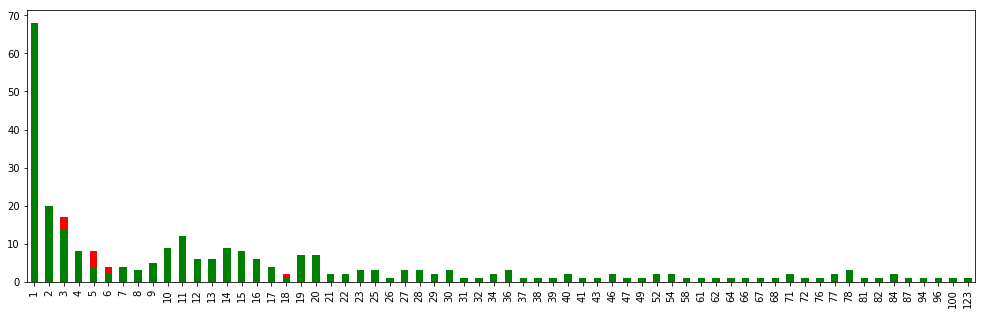

In [14]:
fig, ax = plt.subplots(figsize=(17,5))
spam_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='red');
ham_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='green');

## Preparing the Data

In [15]:
import nltk, os

#if true it will download all the stopwords
if True:
    os.system('python -m nltk.downloader')

In [16]:
# importing Natural Language Toolkit 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#if true will create vectorizer with stopwords
if False:
    stopset = set(stopwords.words("english"))
    vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

In [17]:
#if true will create vectorizer without any stopwords
if True:
    vectorizer = TfidfVectorizer()

In [18]:
# Extract feature column 'Text'
X = vectorizer.fit_transform(data.Text)
# Extract target column 'Class'
y = data.numClass

In [19]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4457 samples.
Testing set has 1115 samples.


## Training and Evaluating Models

In [22]:
# Import the models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import KFold

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [23]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

In [24]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100) 
D = KNeighborsClassifier(n_neighbors=1)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [25]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred) 
    print(pred_val[a])

0.8372093023255813
0.8745762711864407
0.9116607773851589
0.7854251012145749
0.8721804511278195


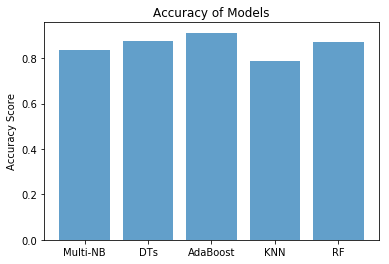

In [26]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

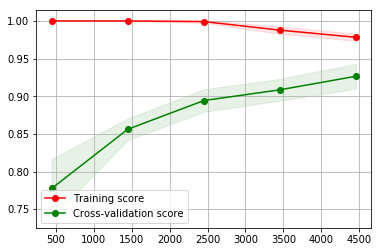

In [27]:
# defining the variable for learning curve
size, score, cv = np.linspace(.1, 1.0, 5), 'f1', KFold( n_splits= 5, random_state= 42)

# calling the learning_curve function from defined variables
size, train, test = learning_curve(C, X, y, cv= cv, scoring=score, n_jobs=1, train_sizes=size)

# Mean and standard deviation of train and test score
train_mean,test_mean  =  np.mean( train, axis=1), np.mean( test, axis=1)
train_std,  test_std  =  np.std(train, axis=1) , np.std(test, axis=1)

# Ploating the Grid
plt.grid()

# Ploating the curve 
plt.fill_between(size, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
plt.fill_between(size,  test_mean - test_std,   test_mean + test_std,  alpha=0.1,color="g")

# Ploating the axis name and legend 
plt.plot(size, train_mean, 'o-', color="r",label="Training score")
plt.plot(size, test_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

## Result Analysis

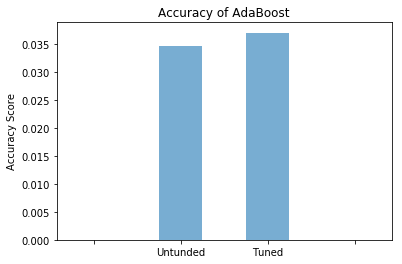

In [28]:
# ploating data for Accuracy Score
# ploating data for Accuracy of Models between 1.00 - 0.90 for better visualization
objects = ('','Untunded', 'Tuned','')
y_pos = np.arange(4)
y_val = [0,0.03470790378,0.037062937063,0 ]
plt.bar(y_pos,y_val, align='center',width = 0.5, alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of AdaBoost')
plt.show()